In [1]:
# Measure Group Optimization 

import pandas as pd
import datetime
import matplotlib.pyplot as plt
import warnings
import re
warnings.filterwarnings("ignore")
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline
import matplotlib
import numpy as np
from __future__ import division
import math

#Read in Data for z scores on Measures for each Measure Group

efficiency = pd.read_csv('C:\CMS Measures Project\DecemberMeasureGroups\pred_efficiency.csv')
experience = pd.read_csv('C:\CMS Measures Project\DecemberMeasureGroups\pred_experience.csv')
mortality = pd.read_csv('C:\CMS Measures Project\DecemberMeasureGroups\pred_outcome_mortality.csv')
process = pd.read_csv('C:\CMS Measures Project\DecemberMeasureGroups\pred_process_eff.csv')
readmission = pd.read_csv('C:\CMS Measures Project\DecemberMeasureGroups\pred_readmission.csv')
safety = pd.read_csv('C:\CMS Measures Project\DecemberMeasureGroups\pred_safety.csv')
timeliness = pd.read_csv('C:\CMS Measures Project\DecemberMeasureGroups\pred_timeliness.csv')
groupScores = pd.read_csv('C:\CMS Measures Project\December Results and Raw Data\DecemberResults.csv')

In [2]:

df = groupScores
summary_cols = [col for col in df.columns if 'Std' in col]
summary_cols

['Std_Outcomes_Mortality_score',
 'Std_Outcomes_Readmission_score',
 'Std_Outcomes_Safety_score',
 'Std_PatientExp_score',
 'Std_Efficiency_score',
 'Std_Process_Effect_score',
 'Std_Process_Time_score']

In [3]:
#Pull all the relevant data into a single frame.
data = efficiency['PROVIDER_ID']
data = data.to_frame('Provider ID')

for df in [efficiency,experience,mortality,process,readmission,safety,timeliness]:
    measure_cols = [col for col in df.columns if 'std' in col]
    data = data.join(df[measure_cols])

data = data.join(groupScores[summary_cols])
data.reset_index()

#Break out data by Measure Group
efficiency = data[['Provider ID','Std_Efficiency_score','std_OP_8','std_OP_10','std_OP_11','std_OP_13','std_OP_14']]
efficiency.name = 'efficiency'
experience = data[['Provider ID','Std_PatientExp_score','std_H_CLEAN_HSP_LINEAR','std_H_COMP_1_LINEAR','std_H_COMP_2_LINEAR',
                   'std_H_COMP_3_LINEAR','std_H_COMP_4_LINEAR','std_H_COMP_5_LINEAR','std_H_COMP_6_LINEAR',
                   'std_H_COMP_7_LINEAR','std_H_HSP_RATING_LINEAR','std_H_QUIET_HSP_LINEAR','std_H_RECMND_LINEAR']]
experience.name = 'experience'
mortality = data[['Provider ID','Std_Outcomes_Mortality_score','std_MORT_30_AMI','std_MORT_30_CABG','std_MORT_30_COPD','std_MORT_30_HF','std_MORT_30_PN',
                  'std_MORT_30_STK','std_PSI_4_SURG_COMP']]
mortality.name = 'mortality'
process = data[['Provider ID','Std_Process_Effect_score','std_IMM_2','std_IMM_3_OP_27','std_OP_4','std_OP_22','std_OP_23','std_OP_29','std_OP_30','std_PC_01',
               'std_STK_4','std_VTE_5','std_VTE_6']]
process.name = 'process'
readmission = data[['Provider ID','Std_Outcomes_Readmission_score','std_READM_30_AMI','std_READM_30_CABG','std_READM_30_COPD',
                    'std_READM_30_HF','std_READM_30_HIP_KNEE','std_READM_30_HOSP_WIDE','std_READM_30_PN','std_READM_30_STK']]
readmission.name = 'name'
safety = data[['Provider ID','Std_Outcomes_Safety_score','std_COMP_HIP_KNEE','std_HAI_1','std_HAI_2','std_HAI_3',
               'std_HAI_4','std_HAI_5','std_HAI_6','std_PSI_90_SAFETY']]
safety.name = 'safety'
timeliness = data[['Provider ID','Std_Process_Time_score','std_ED_1B','std_ED_2B','std_OP_3B','std_OP_5','std_OP_18B',
                   'std_OP_20','std_OP_21']]
timeliness.name = 'timeliness'

              Std_Efficiency_score    std_OP_8 std_OP_10  std_OP_11  \
National Mean            0.0137175  7.6854e-05  0.034579  0.0384939   
ANMC Value                     NaN         NaN       NaN        NaN   

                std_OP_13   std_OP_14  
National Mean  0.00532135  0.00775327  
ANMC Value            NaN         NaN  
              Std_PatientExp_score std_H_CLEAN_HSP_LINEAR std_H_COMP_1_LINEAR  \
National Mean            -0.110907             0.00125558          0.00878052   
ANMC Value                -1.04513              -0.882105           -0.552722   

              std_H_COMP_2_LINEAR std_H_COMP_3_LINEAR std_H_COMP_4_LINEAR  \
National Mean          0.00657516          0.00509291          0.00710827   
ANMC Value              -0.368827           -0.547532            -1.39074   

              std_H_COMP_5_LINEAR std_H_COMP_6_LINEAR std_H_COMP_7_LINEAR  \
National Mean           0.0031537          0.00988635          0.00257725   
ANMC Value                0.49808   

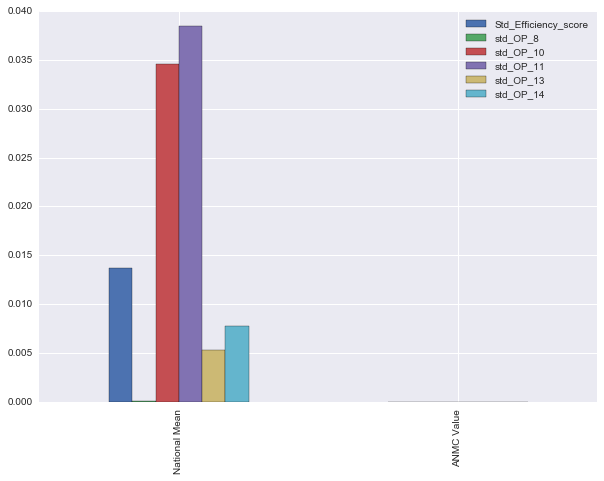

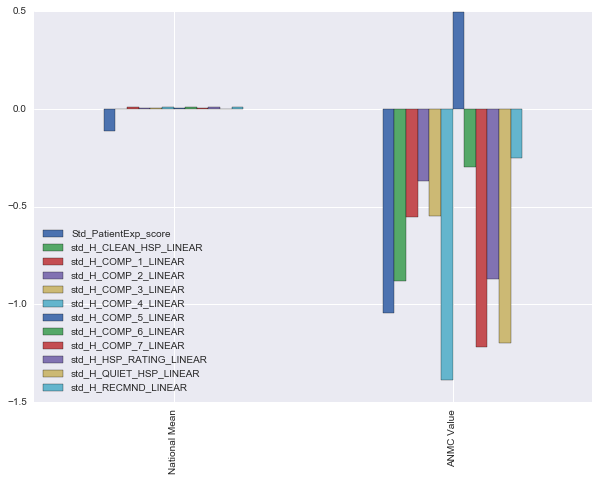

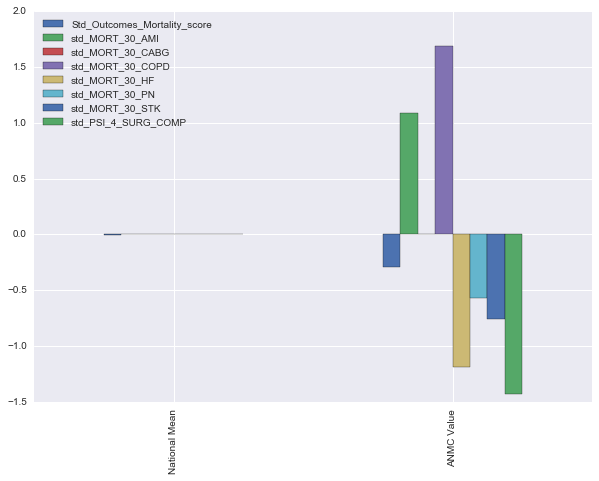

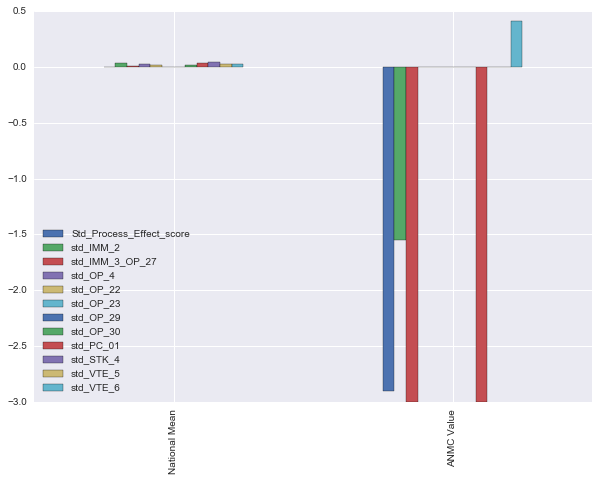

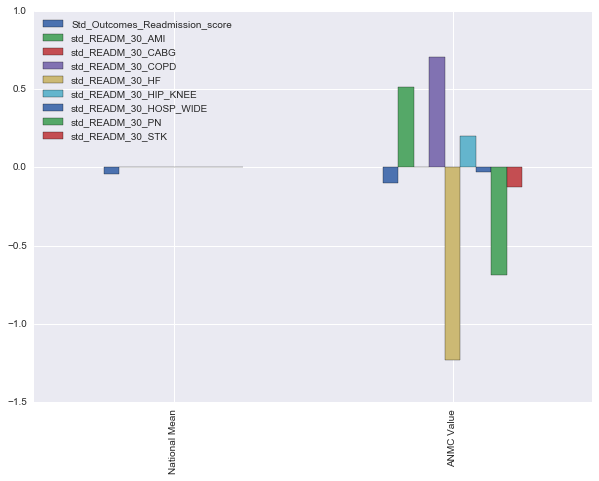

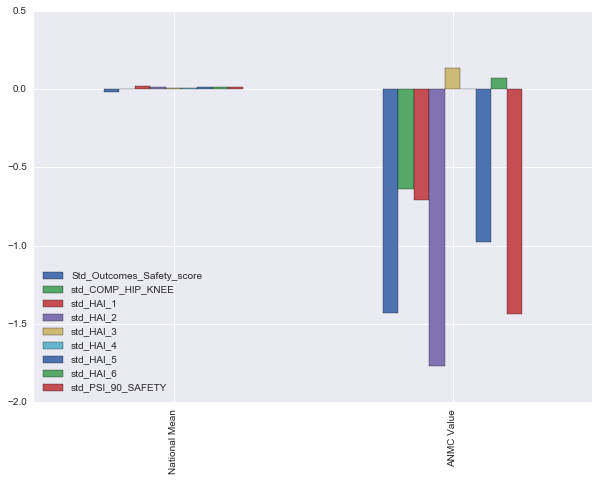

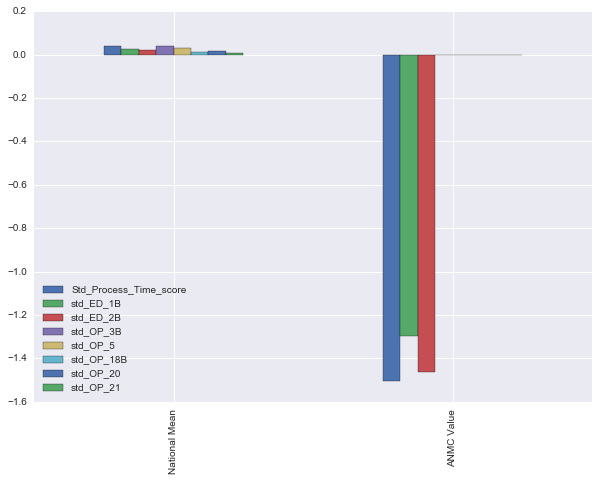

In [4]:
# Create plots highlighting differences between national average and ANMC performance
for df in [efficiency,experience,mortality,process,readmission,safety,timeliness]:
    anmc = df.loc[df['Provider ID']== 20026]
    dif = pd.DataFrame(columns = df.columns)
    dif.set_value('National Mean',dif.columns, df.mean())
    dif.set_value('ANMC Value', dif.columns, anmc.max())
    dif = dif.drop('Provider ID',1)
    dif.plot(kind='bar', figsize=(10,7))

    
    print(dif)

In [5]:
anmc = df.loc[df['Provider ID']== 20026]
anmc

,Provider ID,Std_Process_Time_score,std_ED_1B,std_ED_2B,std_OP_3B,std_OP_5,std_OP_18B,std_OP_20,std_OP_21
94,20026,-1.504901,-1.298854,-1.462525,NaN,NaN,NaN,NaN,NaN


In [6]:
total = pd.DataFrame()
# Transpose Dataframe, sort dataframe by values

#Loop through the Measure Groups
for df in [efficiency, experience, mortality,process,readmission,safety,timeliness]:

    # If we are forced to report all of the measures in the group then do so
    if df.name in ['experience']:
        anmc = df.loc[df['Provider ID']== 20026]
        flip = anmc.drop('Provider ID',1)
        flip = flip.transpose()
        flip.reset_index(level=0, inplace=True)
        flip.columns = ['Measure','Value']
        flip = flip[flip.Measure.str.contains("Std") == False]
        flip = flip.sort_values('Value',ascending=False)
        total = total.append(flip)
    
    # If there is leniancy in the measure group reporting then we take the greatest three individual measures
    # If there are less than three available we take all since it means the group cant be optimized
    
    if df.name in ['efficiency','mortality','process','readmission','safety','timeliness']:
    
        anmc = df.loc[df['Provider ID']== 20026]
        flip = anmc.drop('Provider ID',1)
        flip = flip.transpose()
        flip.reset_index(level=0, inplace=True)
        flip.columns = ['Measure','Value']
        flip = flip[flip.Measure.str.contains("Std") == False]
        flip = flip.sort_values('Value',ascending=False)
        keep = flip.head(3)
        others = flip.tail(len(flip.index)-3)

        if keep.isnull().values.any():
            keep = flip
        else :
            others['Value'] = np.nan
            #keep = keep.append(others)
            

        total = total.append(keep)
        
       

print total

                    Measure     Value
1                  std_OP_8       NaN
2                 std_OP_10       NaN
3                 std_OP_11       NaN
4                 std_OP_13       NaN
5                 std_OP_14       NaN
6       std_H_COMP_5_LINEAR  0.498080
11      std_H_RECMND_LINEAR -0.253054
7       std_H_COMP_6_LINEAR -0.297149
3       std_H_COMP_2_LINEAR -0.368827
4       std_H_COMP_3_LINEAR -0.547532
2       std_H_COMP_1_LINEAR -0.552722
9   std_H_HSP_RATING_LINEAR -0.872658
1    std_H_CLEAN_HSP_LINEAR -0.882105
10   std_H_QUIET_HSP_LINEAR -1.200363
8       std_H_COMP_7_LINEAR -1.221276
5       std_H_COMP_4_LINEAR -1.390736
3          std_MORT_30_COPD  1.692623
1           std_MORT_30_AMI  1.091239
5            std_MORT_30_PN -0.574266
11                std_VTE_6  0.409989
1                 std_IMM_2 -1.552894
2           std_IMM_3_OP_27 -3.000000
4                 std_HAI_3  0.138102
7                 std_HAI_6  0.071098
1         std_COMP_HIP_KNEE -0.640479
1           

In [7]:
#Read in raw SAS data from CSV
raw = pd.read_csv("C:\CMS Measures Project\Group Score Optimization\Group Score Optimization Expirement/RawDec.csv")

# Manipulate the list derived from the scoring analysis algorithim to be in the same format as the raw data.
# Manipulate the list to include denominator values as well
list = total['Measure'].tolist()
list = [x[4:] for x in list]
list = [x.upper() for x in list]
list = list + ['PROVIDER_ID']
list2 = [s + '_DEN' for s in list] + list

anmc = raw.loc[raw['PROVIDER_ID'] == 20026]


def print_full(x):
    pd.set_option('display.max_columns', len(x.columns))
    print(x)
    pd.reset_option('display.max_columns')
    
for columns in anmc.columns:
    if columns not in list2:
        anmc[columns]=np.nan

print_full(anmc)


    PROVIDER_ID  HAI_1_DEN  HAI_2_DEN  HAI_3_DEN  HAI_4_DEN  HAI_5_DEN  \
94        20026        NaN        NaN      4.957        NaN        NaN   

    HAI_6_DEN  HAI_1  HAI_2  HAI_3  HAI_4  HAI_5  HAI_6  READM_30_STK  \
94     19.768    NaN    NaN  0.807    NaN    NaN  0.911           NaN   

    READM_30_PN  READM_30_HOSP_WIDE  READM_30_HIP_KNEE  READM_30_HF  \
94          NaN                 NaN                NaN          NaN   

    READM_30_COPD  READM_30_AMI  MORT_30_STK  MORT_30_PN  MORT_30_HF  \
94            NaN           NaN          NaN       0.176         NaN   

    MORT_30_COPD  MORT_30_AMI  COMP_HIP_KNEE  READM_30_STK_DEN  \
94         0.062        0.127          0.034               NaN   

    READM_30_PN_DEN  READM_30_HOSP_WIDE_DEN  READM_30_HIP_KNEE_DEN  \
94              NaN                     NaN                    NaN   

    READM_30_HF_DEN  READM_30_COPD_DEN  READM_30_AMI_DEN  MORT_30_STK_DEN  \
94              NaN                NaN               NaN         